# Text Model

**Step 1: Import Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors
import gc
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from smart_open import open
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from keras.layers import LSTM, TimeDistributed
from keras.layers import Dot, Activation, Flatten, Multiply, Permute, RepeatVector, Lambda, Softmax, Dropout
from keras.layers import Layer, Reshape
from keras import backend as K

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Step 2: Import Text Preprocessed Data**

In [2]:
finalMatrix= np.load(file="/content/drive/My Drive/finalMatrix.npy")
Y= np.load(file="/content/drive/My Drive/text_Y.npy")
finalMatrix_test= np.load(file="/content/drive/My Drive/finalMatrix_test.npy")
Y_test= np.load(file="/content/drive/My Drive/text_Y_test.npy")

**Step 3: Text Baseline -- CNN Text Model**

In [3]:
def Thresholding(Y_pred, threshold):
  Y_pred2 = []
  for i in range(len(Y_pred)):
    if(Y_pred[i] < threshold):
      Y_pred2.append(0)
    else:
      Y_pred2.append(1)

  return np.array(Y_pred2)

In [4]:
class CNN_Text:
  def __init__(self):
    # Initialising the CNN
    classifier = Sequential()
    # Step 1 - Convolution
    classifier.add(Conv2D(150, (1, 5), input_shape = (finalMatrix.shape[1], finalMatrix.shape[2], finalMatrix.shape[3]), activation = 'relu', data_format="channels_last"))
    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size = (1, 3)))
    # Adding a second convolutional layer
    classifier.add(Conv2D(75, (1, 3), activation = 'relu', data_format="channels_last"))
    classifier.add(MaxPooling2D(pool_size = (1, 2)))
    # Step 3 - Flattening
    classifier.add(Flatten())
    # Step 4 - Full connection
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    # Compiling the CNN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    self.classifier = classifier


  def fitModel(self, X, Y, epoch = 10):
    class_weight = {0: 0.5, 1: 0.6}
    return self.classifier.fit(X, Y, epochs = epoch, class_weight=class_weight)

  def predictModel(self, X):
    return Thresholding(self.classifier.predict(X), 0.5)



**Step 4: Training and Testing**

Epoch 1/10
7/7 [==============================] - 19s 3s/step - loss: 0.3728 - accuracy: 0.5750
Epoch 2/10
7/7 [==============================] - 18s 3s/step - loss: 0.2005 - accuracy: 0.8950
Epoch 3/10
7/7 [==============================] - 20s 3s/step - loss: 0.0500 - accuracy: 0.9850
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 0.0631 - accuracy: 0.9650
Epoch 5/10
7/7 [==============================] - 19s 3s/step - loss: 0.0133 - accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 29s 4s/step - loss: 0.0130 - accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 28s 4s/step - loss: 0.0064 - accuracy: 1.0000
Epoch 8/10
7/7 [==============================] - 23s 3s/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9/10
7/7 [==============================] - 18s 3s/step - loss: 7.0780e-04 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 18s 3s/step - loss: 4.1279e-04 - accuracy: 1.0000


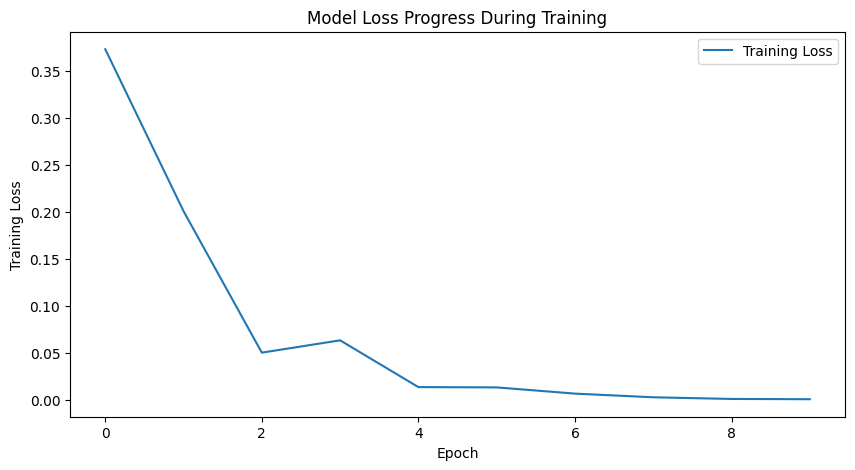

2/2 [==============================] - 3s 470ms/step


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


model = CNN_Text()
history = model.fitModel(finalMatrix, Y, 10)


plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()


Y_Pred = model.predictModel(finalMatrix_test)

In [7]:
accuracy = accuracy_score(Y_test, Y_Pred)
print(f"Accuracy on test set: {accuracy:.2f}")

f1 = f1_score(Y_test, Y_Pred)
print(f"F1 Score on test set: {f1:.2f}")


recall = recall_score(Y_test, Y_Pred)
print(f"Recall on test set: {recall:.2f}")


precision = precision_score(Y_test, Y_Pred)
print(f"Precision on test set: {precision:.2f}")

Accuracy on test set: 0.62
F1 Score on test set: 0.53
Recall on test set: 0.40
Precision on test set: 0.78


**Step 5: Text Baseline -- LSTM Text Model**


In [4]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

class LSTM_Text:
    def __init__(self, input_shape):
        # Initializing the LSTM
        classifier = Sequential()
        # LSTM layer
        classifier.add(LSTM(100, input_shape=input_shape, return_sequences=True))
        classifier.add(Dropout(0.2))
        # Another LSTM layer
        classifier.add(LSTM(50, return_sequences=False))
        classifier.add(Dropout(0.2))
        # Full connection
        classifier.add(Dense(units=128, activation='relu'))
        classifier.add(Dense(units=1, activation='sigmoid'))
        # Compiling the LSTM
        classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.classifier = classifier

    def fitModel(self, X, Y, epoch=10):
        class_weight = {0: 0.5, 1: 0.6}
        return self.classifier.fit(X, Y, epochs=epoch, class_weight=class_weight)

    def predictModel(self, X):
        return Thresholding(self.classifier.predict(X), 0.5)


**Step 6: Training and Testing**

Epoch 1/10
7/7 [==============================] - 28s 3s/step - loss: 0.3802 - accuracy: 0.4950
Epoch 2/10
7/7 [==============================] - 19s 3s/step - loss: 0.3704 - accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 19s 3s/step - loss: 0.3575 - accuracy: 0.5400
Epoch 4/10
7/7 [==============================] - 21s 3s/step - loss: 0.3340 - accuracy: 0.5550
Epoch 5/10
7/7 [==============================] - 21s 3s/step - loss: 0.3290 - accuracy: 0.5500
Epoch 6/10
7/7 [==============================] - 24s 4s/step - loss: 0.3242 - accuracy: 0.6300
Epoch 7/10
7/7 [==============================] - 20s 3s/step - loss: 0.3162 - accuracy: 0.6250
Epoch 8/10
7/7 [==============================] - 21s 3s/step - loss: 0.3105 - accuracy: 0.6300
Epoch 9/10
7/7 [==============================] - 20s 3s/step - loss: 0.3046 - accuracy: 0.6050
Epoch 10/10
7/7 [==============================] - 19s 3s/step - loss: 0.2970 - accuracy: 0.6300


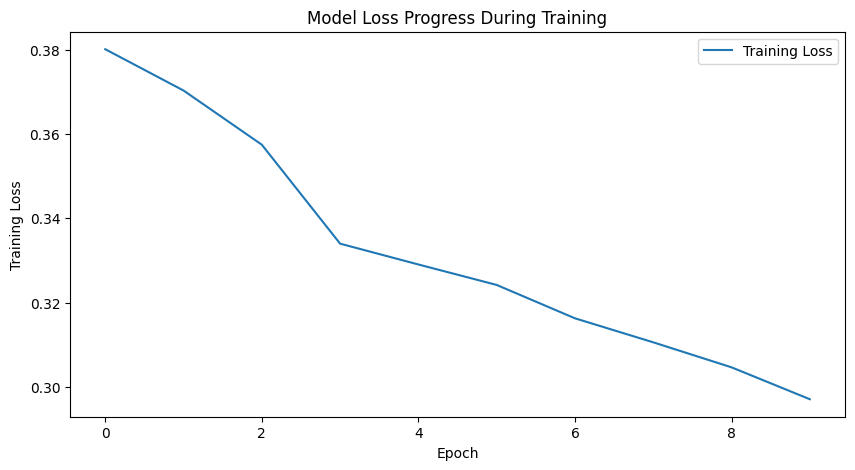

2/2 [==============================] - 3s 483ms/step


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

finalMatrix_LSTM = finalMatrix.reshape(-1, 250, 20*300)
finalMatrix_test_LSTM = finalMatrix_test.reshape(-1, 250, 20*300)

input_shape = (250, 20*300)

model = LSTM_Text(input_shape)
history = model.fitModel(finalMatrix_LSTM, Y, 10)

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()

Y_Pred = model.predictModel(finalMatrix_test_LSTM)


In [13]:
accuracy = accuracy_score(Y_test, Y_Pred)
print(f"Accuracy on test set: {accuracy:.2f}")

f1 = f1_score(Y_test, Y_Pred)
print(f"F1 Score on test set: {f1:.2f}")


recall = recall_score(Y_test, Y_Pred)
print(f"Recall on test set: {recall:.2f}")


precision = precision_score(Y_test, Y_Pred)
print(f"Precision on test set: {precision:.2f}")

Accuracy on test set: 0.60
F1 Score on test set: 0.54
Recall on test set: 0.42
Precision on test set: 0.76


**Step 7: CNN+LSTM+Attention Text Model**

In [12]:
class Attention(Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()

    def build(self, input_shape):

        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")

        super(Attention,self).build(input_shape)

    def call(self, x):

        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a

        if self.return_sequences:
            return output

        return K.sum(output, axis=1)


In [10]:
class CNN_LSTM_Text:
    def __init__(self):
        # Initialising the CNN
        classifier = Sequential()
        # Step 1 - Convolution
        classifier.add(Conv2D(150, (1, 5), input_shape = (finalMatrix.shape[1], finalMatrix.shape[2], finalMatrix.shape[3]), activation = 'relu', data_format="channels_last"))
        # Step 2 - Pooling
        classifier.add(MaxPooling2D(pool_size = (1, 3)))
        # Adding a second convolutional layer
        classifier.add(Conv2D(75, (1, 3), activation = 'relu', data_format="channels_last"))
        classifier.add(MaxPooling2D(pool_size = (1, 2)))
        # Adding LSTM layer
        classifier.add(TimeDistributed(Flatten()))
        classifier.add(LSTM(128, return_sequences=True))   # Add first LSTM Layer
        classifier.add(LSTM(64, return_sequences=True))   # Add second LSTM Layer

        # Attention Layer
        classifier.add(Attention(return_sequences=False))
        # Step 4 - Full connection
        classifier.add(Dense(units = 128, activation = 'relu'))
        classifier.add(Dense(units = 1, activation = 'sigmoid'))
        # Compiling the CNN
        classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
        self.classifier = classifier


    def fitModel(self, X, Y, epoch = 10):
        class_weight = {0: 0.5, 1: 0.6}
        return self.classifier.fit(X, Y, epochs = epoch, class_weight=class_weight)

    def predictModel(self, X):
        return Thresholding(self.classifier.predict(X), 0.5)


**Step 8: Training and Testing**

Epoch 1/10
7/7 [==============================] - 29s 3s/step - loss: 0.3808 - accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 21s 3s/step - loss: 0.3808 - accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 23s 3s/step - loss: 0.3767 - accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 21s 3s/step - loss: 0.3770 - accuracy: 0.5150
Epoch 5/10
7/7 [==============================] - 23s 3s/step - loss: 0.3693 - accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 22s 3s/step - loss: 0.3645 - accuracy: 0.5950
Epoch 7/10
7/7 [==============================] - 21s 3s/step - loss: 0.3465 - accuracy: 0.6700
Epoch 8/10
7/7 [==============================] - 23s 3s/step - loss: 0.3304 - accuracy: 0.6300
Epoch 9/10
7/7 [==============================] - 23s 3s/step - loss: 0.2653 - accuracy: 0.7900
Epoch 10/10
7/7 [==============================] - 22s 3s/step - loss: 0.1505 - accuracy: 0.9100


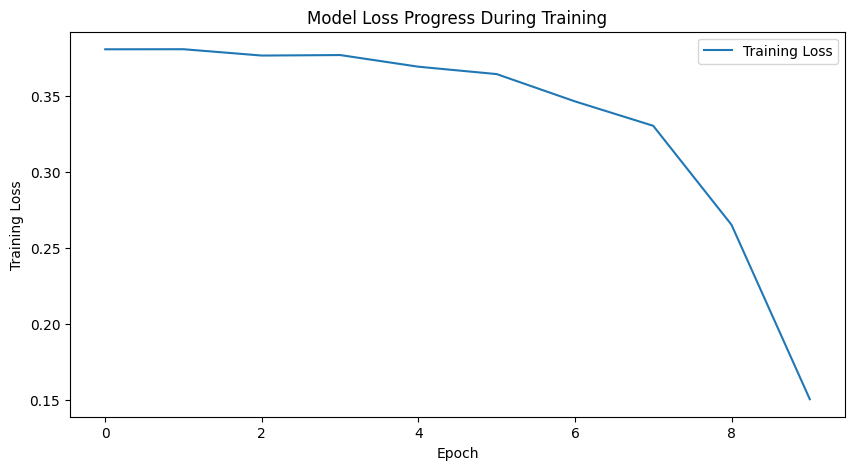

2/2 [==============================] - 3s 563ms/step


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


model = CNN_LSTM_Text()
history = model.fitModel(finalMatrix, Y, 10)


plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()


Y_Pred = model.predictModel(finalMatrix_test)



In [14]:
accuracy = accuracy_score(Y_test, Y_Pred)
print(f"Accuracy on test set: {accuracy:.2f}")

f1 = f1_score(Y_test, Y_Pred)
print(f"F1 Score on test set: {f1:.2f}")


recall = recall_score(Y_test, Y_Pred)
print(f"Recall on test set: {recall:.2f}")


precision = precision_score(Y_test, Y_Pred)
print(f"Precision on test set: {precision:.2f}")

Accuracy on test set: 0.70
F1 Score on test set: 0.58
Recall on test set: 0.45
Precision on test set: 0.80
